In [1]:
from vnpy.app.spread_trading.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.spread_trading.strategies.statistical_arbitrage_strategy import (
    StatisticalArbitrageStrategy
)
from vnpy.app.spread_trading.strategies.bm_arbitrage_strategy import (
    BmArbitrageStrategy
)

from vnpy.app.spread_trading.strategies.basic_spread_strategy import (
    BasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.bm_basic_spread_strategy import (
    BmBasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.spread_statistical_arbitrage_strategy import (
    SpreadStatisticalArbitrageStrategy
)
from vnpy.app.spread_trading.strategies.bm_multi_basic_spread_strategy import (
    BmMultiBasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.bm_basic_date_spread_strategy import (
    BmBasicDateSpreadStrategy
)
from vnpy.app.spread_trading.strategies.bm_q_date_spread_strategy import (
    BmQDateSpreadStrategy
)
from vnpy.app.spread_trading.strategies.spread_rate_strategy import (
    SpreadRateStrategy
)
from vnpy.app.spread_trading.base import LegData, SpreadData
from datetime import datetime


In [2]:
spread = SpreadData(
    name="BM",
    legs=[LegData("BTC-USD.COINBASE"), LegData("XBTZ19.BITMEX")],
    price_multipliers={"XBTZ19.BITMEX": 1, "BTC-USD.COINBASE": -1},
    trading_multipliers={"XBTZ19.BITMEX": 1, "BTC-USD.COINBASE": -1},
    active_symbol="BTC-USD.COINBASE",
    inverse_contracts={"BTC-USD.COINBASE": False, "XBTZ19.BITMEX": False}, # 正向
    min_volume=1
)

In [3]:
engine = BacktestingEngine()
engine.set_parameters(
    spread=spread,
    interval="1m",
    start=datetime(2019,6, 14),
    end=datetime(2019, 12, 27),
    rate=0.00075,
    slippage=0.5,
    size=1,
    pricetick=0.2,
    capital=1_000_000,    
)


# engine.add_strategy(StatisticalArbitrageStrategy, {})
# engine.add_strategy(SpreadStatisticalArbitrageStrategy, {}) #添加boll 差价 判读开仓

# engine.add_strategy(BmArbitrageStrategy, {})
# engine.add_strategy(BasicSpreadStrategy , {})
# engine.add_strategy(BmBasicSpreadStrategy, {"short_price": 150, "cover_price" : 50}) # 只远期开空，近期开多 符合平仓条件后，平空 平多
# 只远期开空，近期开多 添添加最终平仓日期 符合平仓条件后，平空 平多
# engine.add_strategy(BmQDateSpreadStrategy, {"short_rate": 1.3, "cover_rate" : 0.3, "end_date": "2019-3-29", "end_days": 1}) 
engine.add_strategy(SpreadRateStrategy, {"short_rate": 1.8, "cover_rate" :  0.4, "end_date": "2019-12-27", "end_days": 1}) 

# engine.add_strategy(BmMultiBasicSpreadStrategy, {}) # 主动腿多空循环开仓
# engine.add_strategy(BmBasicDateSpreadStrategy, {"short_price": 100, "cover_price" : 50, "start_days" : 3, "end_days": 5, "max_pos" : 50})


2020-02-21 14:55:31.515548	开始加载历史数据
2020-02-21 14:56:29.531111	历史数据加载完成，数据量：275735
2020-02-21 14:56:29.794969	策略初始化完成
2020-02-21 14:56:29.795172	开始回放历史数据
2020-02-21 14:56:41.116947	历史数据回放结束
2020-02-21 14:56:41.117398	开始计算逐日盯市盈亏
2020-02-21 14:56:41.120479	逐日盯市盈亏计算完成
2020-02-21 14:56:41.120728	开始计算策略统计指标
2020-02-21 14:56:41.130805	------------------------------
2020-02-21 14:56:41.130838	首个交易日：	2019-06-24
2020-02-21 14:56:41.130856	最后交易日：	2019-12-23
2020-02-21 14:56:41.130870	总交易日：	183
2020-02-21 14:56:41.131118	盈利交易日：	58
2020-02-21 14:56:41.131134	亏损交易日：	67
2020-02-21 14:56:41.131152	起始资金：	1,000,000.00
2020-02-21 14:56:41.131167	结束资金：	1,132,291.86
2020-02-21 14:56:41.131179	总收益率：	13.23%
2020-02-21 14:56:41.131189	年化收益：	17.35%
2020-02-21 14:56:41.131207	最大回撤: 	-32,840.00
2020-02-21 14:56:41.131219	百分比最大回撤: -3.18%
2020-02-21 14:56:41.131230	最长回撤天数: 	9
2020-02-21 14:56:41.131240	总盈亏：	132,291.86
2020-02-21 14:56:41.131251	总手续费：	15,688.14
2020-02-21 14:56:41.131261	总滑点：	600.00
2020-02-21 14:

/Users/wudi/github/sqt/vnpy1/vnpy/app/spread_trading/backtesting.py:385: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  max_drawdown_start = df["balance"][:max_drawdown_end].argmax()


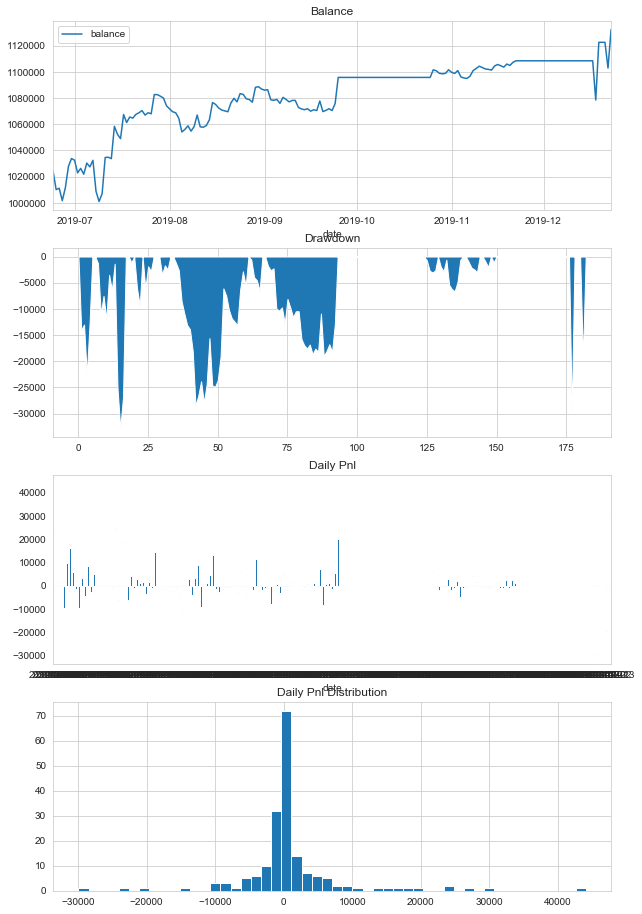

0:01:15.193012


In [4]:
start = datetime.now()
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()
end = datetime.now()
print(end-start)

In [5]:
for trade in engine.trades.values():
    print(trade.orderid, trade.tradeid, trade.direction, trade.price, trade.spread_rate, trade.volume, trade.time)
for trade in engine.trades.values():
    print(trade)

1 1 Direction.SHORT 713.4 6.258333333333339 100.0 2019-06-24 00:08:00
2 2 Direction.LONG 7.0 0.07359125315391085 100.0 2019-07-17 08:11:00
3 3 Direction.SHORT 213.6 2.0074248120300764 100.0 2019-07-18 23:21:00
4 4 Direction.LONG 30.4 0.32354347017896995 100.0 2019-07-27 23:09:00
5 5 Direction.SHORT 180.4 1.8622327790973843 100.0 2019-07-29 23:50:00
6 6 Direction.LONG 21.0 0.245468366272948 100.0 2019-09-25 07:59:00
7 7 Direction.SHORT 183.8 1.8686190766727702 100.0 2019-10-26 12:29:00
8 8 Direction.LONG 29.8 0.3893712868055064 100.0 2019-11-22 04:27:00
9 9 Direction.SHORT 166.2 2.4486366985998576 100.0 2019-12-18 15:48:00
10 10 Direction.LONG 3.4 0.048032488447000296 100.0 2019-12-19 05:04:00
11 11 Direction.SHORT 148.4 2.0276144907723817 100.0 2019-12-22 17:54:00
12 12 Direction.LONG 28.4 0.37889975387480296 100.0 2019-12-23 07:43:00
TradeData(gateway_name='BACKTESTING', symbol='BM', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='1', tradeid='1', direction=<Direction.SHORT: '空'>, offset

In [ ]:
setting = OptimizationSetting()


setting.set_target("total_return")
# setting.set_target("sharpe_ratio")
# setting.set_target("return_drawdown_ratio")
# setting.set_target("daily_net_pnl")



setting.add_parameter("cover_rate", -0.5, 1, 0.1)
setting.add_parameter("short_rate", 0, 2.0, 0.1)
setting.add_parameter("end_date", "2019-12-27")
print(setting.__dict__)
# setting.add_parameter("start_days", 0, 5, 1)
# setting.add_parameter("short_price", 0, 5, 1)


# setting.add_parameter("atr_ma_length", 10, 30, 1)

engine.run_ga_optimization(setting)

# engine.run_optimization(setting)

{'params': {'cover_rate': [-0.5, -0.4, -0.30000000000000004, -0.20000000000000004, -0.10000000000000003, -2.7755575615628914e-17, 0.09999999999999998, 0.19999999999999998, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999], 'short_rate': [0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006], 'end_date': ['2019-12-27']}, 'target_name': 'total_return'}
2020-02-21 14:56:46.977091	参数优化空间：320
2020-02-21 14:56:46.977148	每代族群总数：100
2020-02-21 14:56:46.977169	优良筛选个数：80
2020-02-21 14:56:46.977184	迭代次数：30
2020-02-21 14:56:46.977200	交叉概率：95%
2020-02-21 14:56:46.977221	突变概率：5%
2020-02-21 14:56:46.977328	开始加载历史数据
2020-02-21 14:56:46.977354	历史数据加载完成，数据量：275735
2020-02-21 14:56:47.245184	策略初始化完成
2020-02-21 14:56:47.245400	开始回放历史数据
2020-02-21 14:56:55.345671	历史

/Users/wudi/github/sqt/vnpy1/vnpy/app/spread_trading/backtesting.py:385: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  max_drawdown_start = df["balance"][:max_drawdown_end].argmax()


2020-02-21 14:56:55.599619	策略初始化完成
2020-02-21 14:56:55.599716	开始回放历史数据
2020-02-21 14:57:04.521921	历史数据回放结束
2020-02-21 14:57:04.522088	开始计算逐日盯市盈亏
2020-02-21 14:57:04.543724	逐日盯市盈亏计算完成
2020-02-21 14:57:04.543945	开始计算策略统计指标
2020-02-21 14:57:04.551478	开始加载历史数据
2020-02-21 14:57:04.551643	历史数据加载完成，数据量：275735


/Users/wudi/github/sqt/vnpy1/vnpy/app/spread_trading/backtesting.py:365: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)


2020-02-21 14:57:04.836590	策略初始化完成
2020-02-21 14:57:04.836791	开始回放历史数据
2020-02-21 14:57:13.970587	历史数据回放结束
2020-02-21 14:57:13.970741	开始计算逐日盯市盈亏
2020-02-21 14:57:13.983896	逐日盯市盈亏计算完成
2020-02-21 14:57:13.984063	开始计算策略统计指标
2020-02-21 14:57:13.990636	开始加载历史数据
2020-02-21 14:57:13.990880	历史数据加载完成，数据量：275735
2020-02-21 14:57:14.265326	策略初始化完成
2020-02-21 14:57:14.265472	开始回放历史数据
2020-02-21 14:57:22.657594	历史数据回放结束
2020-02-21 14:57:22.657745	开始计算逐日盯市盈亏
2020-02-21 14:57:22.661112	逐日盯市盈亏计算完成
2020-02-21 14:57:22.661374	开始计算策略统计指标
2020-02-21 14:57:22.667734	开始加载历史数据
2020-02-21 14:57:22.667937	历史数据加载完成，数据量：275735
2020-02-21 14:57:22.920354	策略初始化完成
2020-02-21 14:57:22.920503	开始回放历史数据
2020-02-21 14:57:30.833957	历史数据回放结束
2020-02-21 14:57:30.834069	开始计算逐日盯市盈亏
2020-02-21 14:57:30.836735	逐日盯市盈亏计算完成
2020-02-21 14:57:30.836984	开始计算策略统计指标
2020-02-21 14:57:30.843318	开始加载历史数据
2020-02-21 14:57:30.843501	历史数据加载完成，数据量：275735
2020-02-21 14:57:31.092557	策略初始化完成
2020-02-21 14:57:31.092625	开始回放历史数据
2020-02-21 14:57:

2020-02-21 15:00:49.692261	策略初始化完成
2020-02-21 15:00:49.692345	开始回放历史数据
2020-02-21 15:00:57.584691	历史数据回放结束
2020-02-21 15:00:57.584852	开始计算逐日盯市盈亏
2020-02-21 15:00:57.584869	成交记录为空，无法计算
2020-02-21 15:00:57.584883	开始计算策略统计指标
2020-02-21 15:00:57.585075	开始加载历史数据
2020-02-21 15:00:57.585100	历史数据加载完成，数据量：275735
2020-02-21 15:00:57.838056	策略初始化完成
2020-02-21 15:00:57.838141	开始回放历史数据
2020-02-21 15:01:05.601334	历史数据回放结束
2020-02-21 15:01:05.601475	开始计算逐日盯市盈亏
2020-02-21 15:01:05.604142	逐日盯市盈亏计算完成
2020-02-21 15:01:05.604337	开始计算策略统计指标
2020-02-21 15:01:05.610755	开始加载历史数据
2020-02-21 15:01:05.610874	历史数据加载完成，数据量：275735
2020-02-21 15:01:05.855341	策略初始化完成
2020-02-21 15:01:05.855411	开始回放历史数据
2020-02-21 15:01:13.778716	历史数据回放结束
2020-02-21 15:01:13.778867	开始计算逐日盯市盈亏
2020-02-21 15:01:13.781725	逐日盯市盈亏计算完成
2020-02-21 15:01:13.781859	开始计算策略统计指标
2020-02-21 15:01:13.788233	开始加载历史数据
2020-02-21 15:01:13.788390	历史数据加载完成，数据量：275735
2020-02-21 15:01:14.039995	策略初始化完成
2020-02-21 15:01:14.040156	开始回放历史数据
2020-02-21 15:01

2020-02-21 15:04:40.311414	策略初始化完成
2020-02-21 15:04:40.311535	开始回放历史数据
2020-02-21 15:04:48.209324	历史数据回放结束
2020-02-21 15:04:48.209494	开始计算逐日盯市盈亏
2020-02-21 15:04:48.219561	逐日盯市盈亏计算完成
2020-02-21 15:04:48.219786	开始计算策略统计指标
2020-02-21 15:04:48.226519	开始加载历史数据
2020-02-21 15:04:48.226694	历史数据加载完成，数据量：275735
2020-02-21 15:04:48.477818	策略初始化完成
2020-02-21 15:04:48.477897	开始回放历史数据
2020-02-21 15:04:56.487686	历史数据回放结束
2020-02-21 15:04:56.487965	开始计算逐日盯市盈亏
2020-02-21 15:04:56.493058	逐日盯市盈亏计算完成
2020-02-21 15:04:56.493243	开始计算策略统计指标
2020-02-21 15:04:56.502760	开始加载历史数据
2020-02-21 15:04:56.502931	历史数据加载完成，数据量：275735
2020-02-21 15:04:56.780736	策略初始化完成
2020-02-21 15:04:56.780828	开始回放历史数据
2020-02-21 15:05:07.603554	历史数据回放结束
2020-02-21 15:05:07.603720	开始计算逐日盯市盈亏
2020-02-21 15:05:07.607343	逐日盯市盈亏计算完成
2020-02-21 15:05:07.607655	开始计算策略统计指标
2020-02-21 15:05:07.616890	开始加载历史数据
2020-02-21 15:05:07.617057	历史数据加载完成，数据量：275735
2020-02-21 15:05:07.974831	策略初始化完成
2020-02-21 15:05:07.975002	开始回放历史数据
2020-02-21 15:05:

2020-02-21 15:08:57.307105	策略初始化完成
2020-02-21 15:08:57.307277	开始回放历史数据
2020-02-21 15:09:06.315740	历史数据回放结束
2020-02-21 15:09:06.315895	开始计算逐日盯市盈亏
2020-02-21 15:09:06.320994	逐日盯市盈亏计算完成
2020-02-21 15:09:06.321257	开始计算策略统计指标
2020-02-21 15:09:06.327790	开始加载历史数据
2020-02-21 15:09:06.327978	历史数据加载完成，数据量：275735
2020-02-21 15:09:06.597830	策略初始化完成
2020-02-21 15:09:06.597987	开始回放历史数据
2020-02-21 15:09:14.632721	历史数据回放结束
2020-02-21 15:09:14.632831	开始计算逐日盯市盈亏
2020-02-21 15:09:14.635749	逐日盯市盈亏计算完成
2020-02-21 15:09:14.635895	开始计算策略统计指标
gen	nevals	mean          	std           	min            	max          
0  	100   	[-59.43811268]	[165.38052872]	[-885.08725812]	[15.51889775]
2020-02-21 15:09:14.648053	开始加载历史数据
2020-02-21 15:09:14.648204	历史数据加载完成，数据量：275735
2020-02-21 15:09:14.893359	策略初始化完成
2020-02-21 15:09:14.893545	开始回放历史数据
2020-02-21 15:09:22.682314	历史数据回放结束
2020-02-21 15:09:22.682465	开始计算逐日盯市盈亏
2020-02-21 15:09:22.690356	逐日盯市盈亏计算完成
2020-02-21 15:09:22.690607	开始计算策略统计指标
2020-02-21 15:09:22.696827	开始

2020-02-21 15:12:55.609586	策略初始化完成
2020-02-21 15:12:55.609734	开始回放历史数据
2020-02-21 15:13:05.542266	历史数据回放结束
2020-02-21 15:13:05.542427	开始计算逐日盯市盈亏
2020-02-21 15:13:05.549579	逐日盯市盈亏计算完成
2020-02-21 15:13:05.549815	开始计算策略统计指标
2020-02-21 15:13:05.557030	开始加载历史数据
2020-02-21 15:13:05.557168	历史数据加载完成，数据量：275735
2020-02-21 15:13:05.854176	策略初始化完成
2020-02-21 15:13:05.854306	开始回放历史数据
2020-02-21 15:13:15.640896	历史数据回放结束
2020-02-21 15:13:15.641066	开始计算逐日盯市盈亏
2020-02-21 15:13:15.646205	逐日盯市盈亏计算完成
2020-02-21 15:13:15.646453	开始计算策略统计指标
2020-02-21 15:13:15.654105	开始加载历史数据
2020-02-21 15:13:15.654322	历史数据加载完成，数据量：275735
2020-02-21 15:13:15.952081	策略初始化完成
2020-02-21 15:13:15.952232	开始回放历史数据
2020-02-21 15:13:25.302257	历史数据回放结束
2020-02-21 15:13:25.302432	开始计算逐日盯市盈亏
2020-02-21 15:13:25.305515	逐日盯市盈亏计算完成
2020-02-21 15:13:25.305722	开始计算策略统计指标
2020-02-21 15:13:25.312871	开始加载历史数据
2020-02-21 15:13:25.313099	历史数据加载完成，数据量：275735
2020-02-21 15:13:25.599658	策略初始化完成
2020-02-21 15:13:25.599753	开始回放历史数据
2020-02-21 15:13:

2020-02-21 15:17:14.381410	策略初始化完成
2020-02-21 15:17:14.381554	开始回放历史数据
2020-02-21 15:17:22.492447	历史数据回放结束
2020-02-21 15:17:22.492603	开始计算逐日盯市盈亏
2020-02-21 15:17:22.495338	逐日盯市盈亏计算完成
2020-02-21 15:17:22.495536	开始计算策略统计指标
2020-02-21 15:17:22.501903	开始加载历史数据
2020-02-21 15:17:22.502084	历史数据加载完成，数据量：275735
2020-02-21 15:17:22.753284	策略初始化完成
2020-02-21 15:17:22.753490	开始回放历史数据
2020-02-21 15:17:30.604377	历史数据回放结束
2020-02-21 15:17:30.604516	开始计算逐日盯市盈亏
2020-02-21 15:17:30.607340	逐日盯市盈亏计算完成
2020-02-21 15:17:30.607494	开始计算策略统计指标
2020-02-21 15:17:30.613999	开始加载历史数据
2020-02-21 15:17:30.614120	历史数据加载完成，数据量：275735
2020-02-21 15:17:30.868941	策略初始化完成
2020-02-21 15:17:30.869132	开始回放历史数据
2020-02-21 15:17:38.960837	历史数据回放结束
2020-02-21 15:17:38.961012	开始计算逐日盯市盈亏
2020-02-21 15:17:38.961047	成交记录为空，无法计算
2020-02-21 15:17:38.961064	开始计算策略统计指标
2020-02-21 15:17:38.961162	开始加载历史数据
2020-02-21 15:17:38.961186	历史数据加载完成，数据量：275735
2020-02-21 15:17:39.257250	策略初始化完成
2020-02-21 15:17:39.257350	开始回放历史数据
2020-02-21 15:17

2020-02-21 15:22:34.667860	策略初始化完成
2020-02-21 15:22:34.668004	开始回放历史数据
